In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv("F:\Machine Learning A-Z Template Folder\datasets\housing\housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000010CD45B5208>,
      dtype=object)

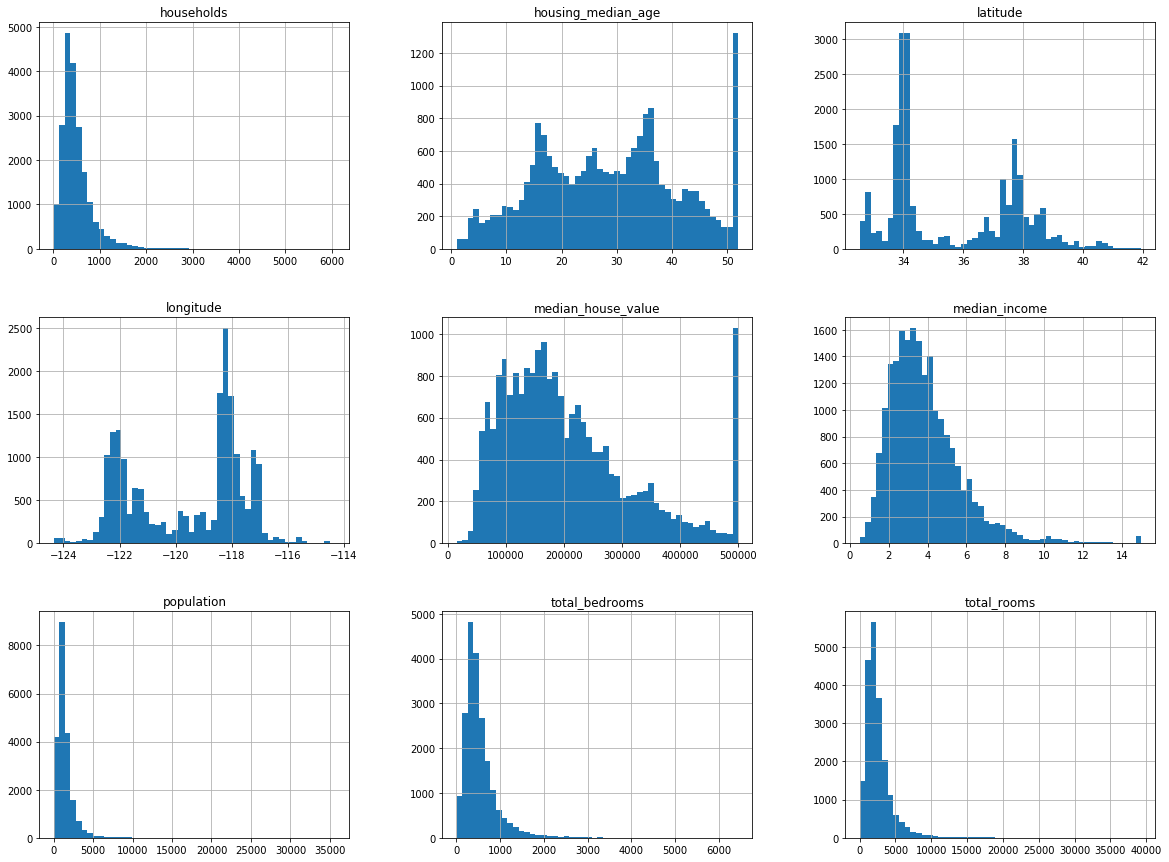

In [7]:
%matplotlib inline
housing.hist(bins = 50, figsize = (20, 15))


In [8]:
housing["income_cat"] = pd.cut(housing["median_income"], 
                              bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels = [1, 2, 3, 4, 5])

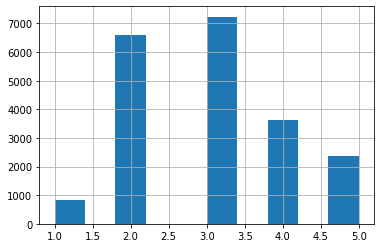

In [9]:
housing["income_cat"].hist()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

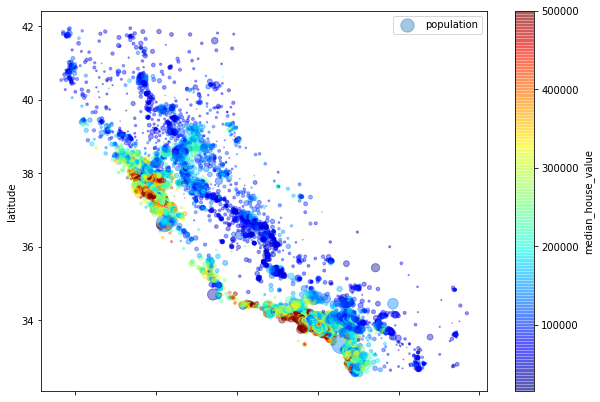

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [13]:
corr_matrix = housing.corr()

In [14]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

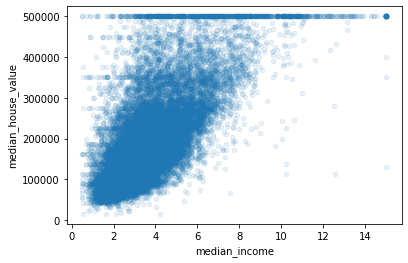

In [15]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value",
            alpha = 0.1)

In [16]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [17]:
corr_matrix = housing.corr()

In [18]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [19]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

house_num = housing.drop("ocean_proximity", axis = 1)
imputer.fit(house_num)
X = imputer.transform(house_num)
housing_tr = pd.DataFrame(X, columns = house_num.columns)

In [20]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [21]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [22]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [23]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [24]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [25]:
house_num = housing.drop("ocean_proximity", axis = 1)

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = False):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        rooms_per_household = X[:,rooms_ix] / X[:,households_ix]
        population_per_household = X[:,population_ix] / X[:,households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_rooms = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_rooms]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                ("imputer", SimpleImputer(strategy = "median")),
                ("attribs_adder", CombinedAttributesAdder()),
                ("std_scaler", StandardScaler())
                ])

In [28]:
from sklearn.compose import ColumnTransformer

num_attribs = list(house_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
                ("num", num_pipeline, num_attribs),
                ("cat", OneHotEncoder(), cat_attribs),
                ]) 

In [29]:
housing_prepared = full_pipeline.fit_transform(housing)

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [32]:
pred = {"Predictions":lin_reg.predict(some_data_prepared), 
       "Labels":list(some_labels)}

In [33]:
pred_df = pd.DataFrame(pred)

In [34]:
pred_df

,Predictions,Labels
0,211888.265404,286600.0
1,321274.251500,340600.0
2,210853.460101,196900.0
3,62261.108208,46300.0
4,194921.765277,254500.0


In [35]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68911.7605423384


In [36]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(housing_prepared, housing_labels)
housing_predictions = dec_tree.predict(housing_prepared)
tree_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
print(tree_rmse)

0.0


In [37]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(housing_prepared, housing_labels)
housing_predictions = forest.predict(housing_prepared)
forest_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
print(forest_rmse)

C:\Users\Ayush Das\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


22194.14118473262


In [39]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dec_tree, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse = np.sqrt(-score)

In [40]:
def print_scores(score):
    print("scores: ", score)
    print("mean: ", score.mean())
    print("standard deviation: ", score.std())

In [41]:
print_scores(tree_rmse)

scores:  [70277.32178435 69474.96025264 68713.410912   70535.15940875
 70886.84240367 74523.01617186 72728.40785464 71489.43005176
 75340.74212231 67894.89207414]
mean:  71186.41830361166
standard deviation:  2282.1082162716502


In [42]:
score = cross_val_score(forest, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
forest_rmse = np.sqrt(-score)

In [44]:
print_scores(forest_rmse)

scores:  [52386.26048232 50220.62787537 51884.39284082 54873.82416029
 51881.52114984 55246.28830667 52277.63172869 50040.37537305
 56025.96089714 53353.82593857]
mean:  52819.07087527584
standard deviation:  1933.6406214941262


In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, 
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [46]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [47]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [49]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63154.415589174874 {'max_features': 2, 'n_estimators': 3}
55589.388828234485 {'max_features': 2, 'n_estimators': 10}
52078.2962837878 {'max_features': 2, 'n_estimators': 30}
58776.03816098982 {'max_features': 4, 'n_estimators': 3}
51810.972157702665 {'max_features': 4, 'n_estimators': 10}
50296.46937752837 {'max_features': 4, 'n_estimators': 30}
57966.966619462684 {'max_features': 6, 'n_estimators': 3}
51287.67607124727 {'max_features': 6, 'n_estimators': 10}
49516.675854520574 {'max_features': 6, 'n_estimators': 30}
58711.613676614026 {'max_features': 8, 'n_estimators': 3}
51476.69309930047 {'max_features': 8, 'n_estimators': 10}
49879.0933469643 {'max_features': 8, 'n_estimators': 30}
61608.2911641946 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53999.24592176215 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59621.91563694154 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52334.19718254938 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [52]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse= np.sqrt(final_mse)

In [53]:
print(final_rmse)

47542.04122956388
